In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_labels = []
train_samples = []

In [3]:
# Experimental drugs scenario
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who didn't experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The majority of younger individuals
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The majority of older individuals
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
# View train_samples
train_samples

[15,
 98,
 22,
 83,
 55,
 96,
 32,
 65,
 64,
 99,
 46,
 98,
 60,
 94,
 64,
 98,
 30,
 72,
 52,
 92,
 48,
 79,
 52,
 91,
 57,
 83,
 26,
 88,
 37,
 72,
 34,
 67,
 49,
 98,
 60,
 72,
 13,
 74,
 15,
 84,
 63,
 97,
 32,
 88,
 57,
 76,
 27,
 86,
 22,
 88,
 48,
 85,
 48,
 85,
 58,
 70,
 15,
 99,
 53,
 74,
 35,
 77,
 47,
 97,
 48,
 90,
 22,
 72,
 30,
 99,
 59,
 73,
 15,
 95,
 49,
 88,
 46,
 96,
 27,
 67,
 56,
 100,
 31,
 94,
 22,
 86,
 25,
 82,
 48,
 94,
 27,
 91,
 36,
 73,
 27,
 66,
 44,
 83,
 32,
 74,
 41,
 70,
 15,
 83,
 20,
 67,
 51,
 90,
 19,
 72,
 64,
 70,
 53,
 90,
 44,
 87,
 22,
 88,
 31,
 85,
 20,
 69,
 40,
 95,
 15,
 84,
 15,
 86,
 28,
 84,
 19,
 82,
 17,
 86,
 25,
 82,
 64,
 95,
 35,
 72,
 44,
 70,
 60,
 87,
 13,
 90,
 13,
 90,
 52,
 69,
 46,
 94,
 63,
 77,
 19,
 70,
 23,
 84,
 42,
 96,
 52,
 82,
 52,
 66,
 43,
 86,
 16,
 93,
 48,
 94,
 38,
 97,
 62,
 89,
 55,
 89,
 64,
 99,
 28,
 66,
 48,
 69,
 31,
 92,
 50,
 75,
 56,
 92,
 20,
 84,
 31,
 85,
 17,
 66,
 63,
 85,
 33,
 88,
 40,
 70,

In [5]:
# Convert data into numpy arrays
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [6]:
# Shuffle the two lists
train_labels, train_samples = shuffle(train_labels, train_samples)

In [7]:
train_samples.reshape(-1, 1)

array([[81],
       [34],
       [66],
       ...,
       [85],
       [92],
       [20]])

In [8]:
# Scale the ages from a scale of 13 to 100 to 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit-transform doesn't accept 1-d data
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [9]:
# Print out the scaled data
scaled_train_samples

array([[0.7816092 ],
       [0.24137931],
       [0.6091954 ],
       ...,
       [0.82758621],
       [0.90804598],
       [0.08045977]])

## Sequential Model

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [11]:
# Define model
model = Sequential([
    Dense(units=16, input_shape=(1,), activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=2, activation="softmax")
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Shape of input layer
scaled_train_samples.shape

(2100, 1)

In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [15]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
2100/2100 - 2s - loss: 0.6933 - acc: 0.5843
Epoch 2/30
2100/2100 - 1s - loss: 0.6627 - acc: 0.6190
Epoch 3/30
2100/2100 - 1s - loss: 0.6278 - acc: 0.6938
Epoch 4/30
2100/2100 - 1s - loss: 0.5802 - acc: 0.7900
Epoch 5/30
2100/2100 - 1s - loss: 0.5398 - acc: 0.8157
Epoch 6/30
2100/2100 - 1s - loss: 0.5048 - acc: 0.8352
Epoch 7/30
2100/2100 - 1s - loss: 0.4717 - acc: 0.8495
Epoch 8/30
2100/2100 - 1s - loss: 0.4412 - acc: 0.8705
Epoch 9/30
2100/2100 - 1s - loss: 0.4137 - acc: 0.8805
Epoch 10/30
2100/2100 - 1s - loss: 0.3897 - acc: 0.8881
Epoch 11/30
2100/2100 - 1s - loss: 0.3690 - acc: 0.9019
Epoch 12/30
2100/2100 - 1s - loss: 0.3519 - acc: 0.9019
Epoch 13/30
2100/2100 - 1s - loss: 0.3377 - acc: 0.9071
Epoch 14/30
2100/2100 - 1s - loss: 0.3258 - acc: 0.9143
Epoch 15/30
2100/2100 - 1s - loss: 0.3158 - acc: 0.9119
Epoch 16/30
2100/2100 - 1s - loss: 0.3072 - acc: 0.9181
Epoch 17/30
2100/2100 - 1s - loss: 0.3001 - acc: 0.9171
Epoch 18/30
2100/2100 - 1s - loss: 0.2943 - acc: 0.9195
E

In [16]:
# To get metrics for validation set
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/30
1890/1890 - 1s - loss: 0.2636 - acc: 0.9333 - val_loss: 0.2526 - val_acc: 0.9333
Epoch 2/30
1890/1890 - 1s - loss: 0.2627 - acc: 0.9323 - val_loss: 0.2512 - val_acc: 0.9333
Epoch 3/30
1890/1890 - 1s - loss: 0.2620 - acc: 0.9339 - val_loss: 0.2498 - val_acc: 0.9524
Epoch 4/30
1890/1890 - 1s - loss: 0.2614 - acc: 0.9354 - val_loss: 0.2491 - val_acc: 0.9333
Epoch 5/30
1890/1890 - 1s - loss: 0.2606 - acc: 0.9333 - val_loss: 0.2484 - val_acc: 0.9333
Epoch 6/30
1890/1890 - 1s - loss: 0.2601 - acc: 0.9328 - val_loss: 0.2478 - val_acc: 0.9333
Epoch 7/30
1890/1890 - 2s - loss: 0.2596 - acc: 0.9328 - val_loss: 0.2466 - val_acc: 0.9333
Epoch 8/30
1890/1890 - 1s - loss: 0.2592 - acc: 0.9360 - val_loss: 0.2460 - val_acc: 0.9333
Epoch 9/30
1890/1890 - 2s - loss: 0.2587 - acc: 0.9328 - val_loss: 0.2451 - val_acc: 0.9524
Epoch 10/30
1890/1890 - 2s - loss: 0.2580 - acc: 0.9423 - val_loss: 0.2452 - val_acc: 0.9333
Epoch 11/30
1890/1890 - 2s - los

## Testing the Model

In [17]:
test_samples = []
test_labels = []

In [18]:
# Experimental drugs scenario
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who didn't experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The majority of younger individuals
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The majority of older individuals
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [19]:
# Convert data into numpy arrays
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [20]:
# Shuffle the two lists
test_labels, test_samples = shuffle(test_labels, test_samples)

# Scale the data features
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

## Predict

In [21]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [22]:
for i in predictions:
    print(i)

[0.07773572 0.9222643 ]
[0.9747049  0.02529501]
[0.04893184 0.9510682 ]
[0.94359726 0.05640272]
[0.04893184 0.9510682 ]
[0.07203846 0.9279615 ]
[0.04181827 0.95818174]
[0.11283044 0.8871696 ]
[0.936816   0.06318399]
[0.9740906  0.02590937]
[0.9742066 0.0257934]
[0.09038279 0.9096172 ]
[0.16137594 0.83862406]
[0.96922505 0.03077491]
[0.9708439 0.0291561]
[0.07203846 0.9279615 ]
[0.9739742  0.02602585]
[0.7032138  0.29678616]
[0.975155   0.02484501]
[0.97493094 0.02506902]
[0.97498715 0.02501284]
[0.08384287 0.9161572 ]
[0.894353   0.10564696]
[0.02209866 0.97790134]
[0.03864308 0.9613569 ]
[0.9675194  0.03248058]
[0.96382993 0.03617002]
[0.10485352 0.8951464 ]
[0.22063407 0.7793659 ]
[0.9494277  0.05057232]
[0.04181827 0.95818174]
[0.0203889  0.97961116]
[0.96382993 0.03617002]
[0.22063407 0.7793659 ]
[0.97373974 0.02626033]
[0.07203846 0.9279615 ]
[0.5224995  0.47750047]
[0.97504324 0.02495677]
[0.04181827 0.95818174]
[0.9740906  0.02590937]
[0.05290589 0.94709414]
[0.03044849 0.969551

In [23]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [25]:
for i in rounded_predictions:
    print(i)

1
0
1
0
1
1
1
1
0
0
0
1
1
0
0
1
0
0
0
0
0
1
0
1
1
0
0
1
1
0
1
1
0
1
0
1
0
0
1
0
1
1
1
0
0
0
0
0
0
1
1
0
0
0
1
0
1
0
0
1
1
1
0
1
1
0
0
0
0
1
0
0
0
1
0
0
1
1
1
0
0
1
1
1
0
0
0
0
0
1
1
1
1
1
1
0
1
0
1
1
1
1
0
0
1
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
1
0
1
0
1
1
1
1
0
1
1
1
1
0
1
1
0
0
1
1
0
1
1
1
0
0
1
1
1
1
1
0
0
0
1
0
1
0
0
1
1
0
1
0
0
0
1
1
1
1
0
1
1
1
1
0
1
0
1
0
1
0
0
0
0
1
0
1
1
0
1
0
1
1
0
0
0
1
1
0
0
1
0
0
1
1
1
1
0
0
0
1
1
0
1
0
1
0
0
0
1
1
0
1
1
1
0
1
0
0
1
0
0
1
1
0
0
0
0
0
1
0
0
1
1
0
1
0
0
1
1
0
0
1
1
1
1
0
0
0
0
1
0
1
1
1
0
1
1
1
1
1
1
1
1
0
0
0
0
1
0
1
1
0
1
0
1
0
0
0
0
0
1
0
0
0
0
1
0
1
1
1
1
1
0
1
0
0
0
1
0
0
0
1
1
0
1
0
1
1
1
1
1
1
1
1
0
1
0
1
1
0
1
0
0
0
0
1
1
0
1
1
0
0
0
1
1
0
0
1
1
1
1
0
1
0
0
1
0
0
0
1
0
0
1
0
0
1
1
0
1
0
0
0
0
1
1
1
0
0
1
1
1
0
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
0
0
0
1
1
0
0
0
0
0
0
0


In [30]:
np.argmax?

## Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [33]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [34]:
# View the confusion matrix
cm

array([[196,  14],
       [ 10, 200]], dtype=int64)

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[196  14]
 [ 10 200]]


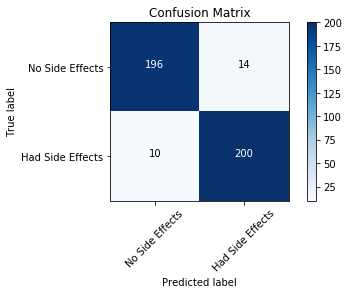

In [40]:
cm_plot_labels = ["No Side Effects", "Had Side Effects"]
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

## Save and Load a Model